# Assignment:

1. Perform some movie recommendations and analysis for user 2:
- How many movies has this user watched?
- Plot a bar chart of their movie ratings. The bar chart should be the counts of the number of unique ratings.
    - Hint: the `sort_index()` function from pandas might be helpful to make the bar plot look nicer.
- What are some of user 2's top movies?
    - Hint: to get the actual movie titles, you can use pandas [merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) function, although using the movie IDs is OK too.
- Find the most similar user in the movielens dataset to user 2 using at least 2 distance metrics. Be sure to use cosine distance as one of your choices.
- Recommend a few movies for user 2 using similarity metrics.
- Do the recommendations from this method make sense?
- Write a short analysis of the results, and justify which similarity metric(s) you used.

Optional challenges:
- Perform other analyses (e.g. EDA, visualizations) of the movies watched from this dataset, or from a bigger part of the dataset for the movielens dataset: https://grouplens.org/datasets/movielens/
- Add yourself as a user in the data with ratings for movies you've watched, and find recommendations for next movies to watch. 
- Use a more advanced collaborative or content-based recommender to make recommendations (e.g. using the surprise package in Python)
    - Try making predictions for user 2. How do they compare with our basic model?
    - Add your own movie ratings, or use another recommender dataset and add your own preferences, then get recommendations for yourself

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

In [10]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [17]:
df = ratings.merge(movies, how='inner', on='movieId')
df

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


### How many movies has this user watched?

In [14]:
user2_unique = df[df['userId'] == 2.0].nunique()
movies_seen_by_user2 = user2_unique['movieId']
f'User 2 has rated {movies_seen_by_user2} movies'

'User 2 has rated 29 movies'

### Plot a bar chart of their movie ratings. The bar chart should be the counts of the number of unique ratings.

In [15]:
user2_ratings = df[(df['userId'] == 2.0) & (df['rating'] >= 0.0)]
frequency = user2_ratings['rating'].value_counts()
print('rating', 'frequency')
print(frequency)

rating frequency
4.0    9
5.0    6
3.5    4
3.0    4
4.5    4
2.5    1
2.0    1
Name: rating, dtype: int64


[Text(0.5, 0, 'Rating'), Text(0, 0.5, 'Frequency')]

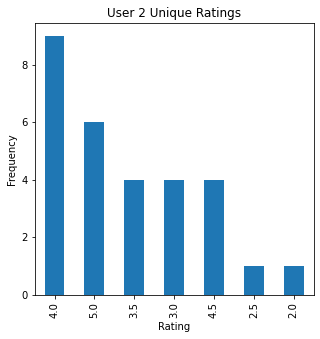

In [16]:
ax = frequency.plot(kind='bar',
               title="User 2 Unique Ratings",
              figsize=(5,5))
ax.set(xlabel='Rating',
       ylabel='Frequency')

### What are some of user 2's top movies?

In [29]:
user2_movies = df[df['userId'] == 2.0]
top_user2_movies = user2_movies.sort_values(by='rating', ascending=False)
top_user2_movies[top_user2_movies['rating'] == 5.0]

,userId,movieId,rating,timestamp,title,genres
18091,2,131724,5.0,1445714851,The Jinx: The Life and Deaths of Robert Durst ...,Documentary
18044,2,122882,5.0,1445715272,Mad Max: Fury Road (2015),Action|Adventure|Sci-Fi|Thriller
17848,2,106782,5.0,1445714966,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama
17648,2,89774,5.0,1445715189,Warrior (2011),Drama
17213,2,60756,5.0,1445714980,Step Brothers (2008),Comedy
17627,2,80906,5.0,1445715172,Inside Job (2010),Documentary


### Find the most similar user in the movielens dataset to user 2 using at least 2 distance metrics. Be sure to use cosine distance as one of your choices.

In [45]:
wide = df.pivot(index='userId', columns='movieId', values='rating')
wide.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
cor = wide.T.corr()

In [47]:
cor.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,NaN,0.079819,0.207983,0.268749,-0.291636,-0.118773,0.469668,0.918559,-0.037987,...,9.157371e-02,-1.597727e-16,-0.061503,-0.407556,-0.164871,0.066378,0.174557,0.268070,-0.175412,-0.032086
2,NaN,1.0,NaN,NaN,NaN,NaN,-0.991241,NaN,NaN,0.037796,...,-3.873468e-01,NaN,-1.000000,NaN,NaN,0.583333,NaN,-0.125000,NaN,0.623288
3,0.079819,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.433200,NaN,NaN,-0.791334,-0.333333,-0.395092,NaN,0.569562
4,0.207983,NaN,NaN,1.000000,-0.336525,0.148498,0.542861,0.117851,NaN,0.485794,...,-2.221127e-01,3.966413e-01,0.090090,-0.080296,0.400124,0.144603,0.116518,-0.170501,-0.277350,-0.043786
5,0.268749,NaN,NaN,-0.336525,1.000000,0.043166,0.158114,0.028347,NaN,-0.777714,...,2.719480e-16,1.533034e-01,0.234743,0.067791,-0.364156,0.244321,0.231080,-0.020546,0.384111,0.040582


In [48]:
cor.loc[2].sort_values(ascending=False)

userId
2      1.0
341    1.0
93     1.0
143    1.0
148    1.0
      ... 
602    NaN
604    NaN
605    NaN
607    NaN
609    NaN
Name: 2, Length: 610, dtype: float64

In [49]:
wide.fillna(-1, inplace=True)

In [53]:
def euclidean_distance(vector1, vector2):
    return np.sqrt(np.sum((vector1 - vector2) ** 2))

def euclidean_distance(vector1, vector2):
    return np.linalg.norm(vector1 - vector2)
    
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import pdist, squareform
euclidean_distances = squareform(pdist(wide, metric=euclidean))
euclidean_df = pd.DataFrame(data=euclidean_distances, columns=wide.index, index=wide.index)
euclidean_df.loc[2].sort_values()

userId
2        0.000000
442     29.000000
461     30.495901
189     30.809901
508     31.488093
          ...    
448    171.200175
610    171.373860
599    185.184368
474    206.630709
414    232.408046
Name: 2, Length: 610, dtype: float64

In [54]:
cosine_distances = squareform(pdist(wide, metric='cosine'))
cosine_df = pd.DataFrame(cosine_distances, columns=wide.index, index=wide.index)
cosine_df.loc[2].sort_values()

userId
2      0.000000
442    0.042025
461    0.046059
189    0.046957
508    0.049443
         ...   
610    0.762312
448    0.817785
599    0.936812
474    0.975777
414    1.084648
Name: 2, Length: 610, dtype: float64

In [156]:
euclidean = euclidean_df.loc[2].sort_values().loc[422]
cosine = cosine_df.loc[2].sort_values().loc[422]
print('User 422s movie preferences are most similar to User 2s:')
print('Euclidean Distance: %.3f' %euclidean)
print('Cosine Distance: %.3f' %cosine)

User 422s movie preferences are most similar to User 2s:
Euclidean Distance: 50.222
Cosine Distance: 0.120


### Recommend a few movies for user 2 using similarity metrics.

In [122]:
wide = df.pivot(index='userId', columns='movieId', values='rating')

In [129]:
rated_5_by_422_not_watched_by_2 = (wide.loc[422] == 5) & (wide.loc[2].isna())
user2_notseen = wide.loc[2][rated_5_by_422_not_watched_by_2]
user422_5 = wide.loc[422][rated_5_by_422_not_watched_by_2]
print(wide.loc[2][rated_5_by_422_not_watched_by_2])
print(wide.loc[422][rated_5_by_422_not_watched_by_2])

movieId
260    NaN
750    NaN
922    NaN
1193   NaN
1213   NaN
1272   NaN
1387   NaN
2728   NaN
Name: 2, dtype: float64
movieId
260     5.0
750     5.0
922     5.0
1193    5.0
1213    5.0
1272    5.0
1387    5.0
2728    5.0
Name: 422, dtype: float64


In [137]:
wide.loc[422].sort_values(ascending=False)

movieId
1213      5.0
922       5.0
2728      5.0
1193      5.0
1387      5.0
         ... 
193581    NaN
193583    NaN
193585    NaN
193587    NaN
193609    NaN
Name: 422, Length: 9724, dtype: float64

In [155]:
R1 = df[(df['userId'] == 422) & (df['movieId'] == 1213)]
R2 = df[(df['userId'] == 422) & (df['movieId'] == 922)]
R3 = df[(df['userId'] == 422) & (df['movieId'] == 2728)]
R4 = df[(df['userId'] == 422) & (df['movieId'] == 1193)]
R5 = df[(df['userId'] == 422) & (df['movieId'] == 1387)]
print('Top 5 Movie Recommendations for User 2 ')
print()
print('Movie 1:  ')
print(R1['title'])
print(R1['genres'])
print()
print('Movie 2:  ')
print(R2['title'])
print(R2['genres'])
print()
print('Movie 3:  ')
print(R3['title'])
print(R3['genres'])
print()
print('Movie 4:  ')
print(R4['title'])
print(R4['genres'])
print()
print('Movie 5:  ')
print(R5['title'])
print(R5['genres'])

Top 5 Movie Recommendations for User 2 

Movie 1:  
7846    Goodfellas (1990)
Name: title, dtype: object
7846    Crime|Drama
Name: genres, dtype: object

Movie 2:  
39955    Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
Name: title, dtype: object
39955    Drama|Film-Noir|Romance
Name: genres, dtype: object

Movie 3:  
83162    Spartacus (1960)
Name: title, dtype: object
83162    Action|Drama|Romance|War
Name: genres, dtype: object

Movie 4:  
48949    One Flew Over the Cuckoo's Nest (1975)
Name: title, dtype: object
48949    Drama
Name: genres, dtype: object

Movie 5:  
71201    Jaws (1975)
Name: title, dtype: object
71201    Action|Horror
Name: genres, dtype: object


I assume these recommendations make sense based on the similarity analysis done between users 2 and 422 resulting in a low cosine distance.

# Analysis/Summary

For both parts of the assignment, write a short analysis and summary of what you did, the results, and the significance. Do this in a markdown cell here at the bottom, like this one.

One thing that would have made the results more accurate is utilizing the timestamps of the ratings. Basing the recommendations off most recent ratings owuld give a greater idea of User 2's current interests and therefore would change the recommendations. Ultimately it seems user 2 has an interest in more recent comedies, action, dramas and documentaries. No documentaries were recommended based on user 422's top ratings. Also recommending movies based off of more similar user ratings would enhance these recommendations even more.